In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
pwd()

'/home/crazyjeannot/Documents/Doctorat/literary_gender_trouble-main'

In [2]:
df_corpus = pd.read_csv(r'../../master/M2/master_thesis/meta_data/corpus.csv')

In [3]:
df_corpus[0:2]

,doc_name,date,auteur,titre,fabula,gender,canon
0,1811_Chateaubriand-François-Rene-de_Oeuvres-co...,1811,françois rene de chateaubriand,oeuvres completes,True,male,canon
1,1812_Kock-Paul-de_L-enfant-de-ma-femme,1812,paul de kock,l enfant de ma femme,False,male,non-canon


### Pourcentage de romans écrits par des femmes

## Corpus Chapitres

In [4]:
list_dates = [int(date) for date in df_corpus['date']]

In [8]:
def decades(list_dates):
    list_decades, list_decades_vues, list_nb_romans_decades = [], [], []
    i, nb_romans_decades = 0, 0
    for i in range(len(list_dates)):
        nb_romans_decades+=1
        if list_dates[i] % 10 == 1 and list_dates[i] != 1811 and list_dates[i] not in list_decades_vues:#10==1
            list_decades.append(list_dates[i]-1)
            list_decades_vues.append(list_dates[i])
            list_nb_romans_decades.append(nb_romans_decades)
            nb_romans_decades = 0

    return list_decades, list_nb_romans_decades

In [9]:
list_decades, list_nb_romans_decades = decades(list_dates)

In [13]:
zipped = list(zip(list_decades, list_nb_romans_decades))

In [14]:
df_decades_repartition = pd.DataFrame(zipped, columns=["decades", "nb_romans"])

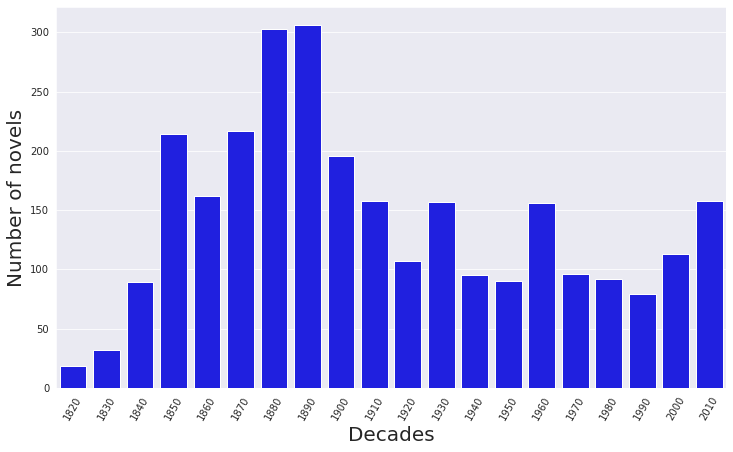

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,7))
sns.barplot(data=df_decades_repartition, x='decades', y='nb_romans', color='b')

#plt.title('Distribution of the number of novels over time', fontsize=20)
plt.xlabel('Decades', fontsize=20)
plt.ylabel('Number of novels', fontsize=20)
plt.xticks(rotation=60)

plt.show()

In [ ]:
nb_romans

In [27]:
list_gender = df_corpus['gender']

In [40]:
def gender_decades(list_dates, list_gender):
    list_decades, list_nbmale_decades,  list_nbfemale_decades, list_decades_vues, list_female_pourcentage = [], [], [], [], []
    conteur_male, conteur_female, i = 0, 0, 0
    for i in range(len(list_dates)):
        if list_dates[i] % 5 == 0 and list_dates[i] != 1811 and list_dates[i] not in list_decades_vues:#10==1
            list_decades.append(list_dates[i]-1)
            list_nbmale_decades.append(conteur_male)
            list_nbfemale_decades.append(conteur_female)
            list_decades_vues.append(list_dates[i])
            list_female_pourcentage.append(100*conteur_female/(conteur_female + conteur_male))
            conteur_female = 0
            conteur_male = 0

            
        if list_gender[i] == 'female':
            conteur_female+=1
        else:
            conteur_male+=1
            
        
    return list_decades, list_nbmale_decades,  list_nbfemale_decades, list_female_pourcentage

In [41]:
list_decades, list_nbmale_decades,  list_nbfemale_decades, list_female_pourcentage = gender_decades(list_dates, list_gender)

In [42]:
zipped = list(zip(list_decades, list_female_pourcentage))

In [43]:
df_gender_repartition = pd.DataFrame(zipped, columns=["decades", "female_rate"])

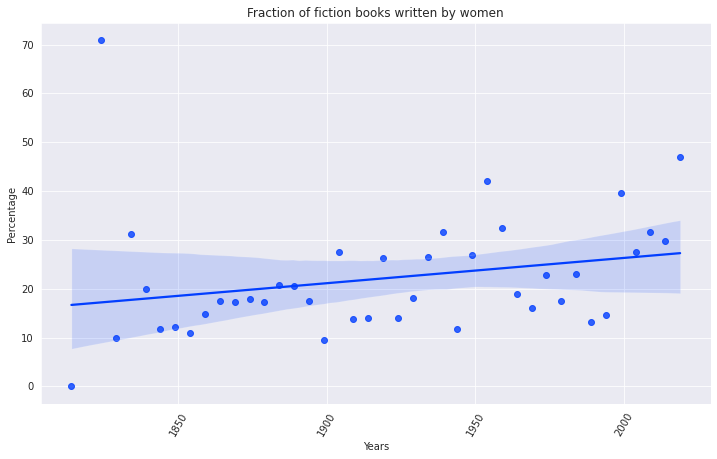

In [54]:
sns.set_style('darkgrid')
sns.set_palette('bright')
plt.figure(figsize=(12,7))
sns.regplot(data=df_gender_repartition, x='decades', y='female_rate')

plt.title('Fraction of fiction books written by women')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.xticks(rotation=60)

plt.show()

### Corpus Fictions Littéraires 

### Description of women, as a percentage of characterization in fiction